<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/mnist_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import random

In [11]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
x = mnist.data
y = mnist.target
y=y.astype(np.uint8())
print(x.shape)
print(y.shape)

# split into training and testing
xtrain, xtest, ytrain, ytest = x[:60000], x[60000:], y[:60000], y[60000:]

(70000, 784)
(70000,)


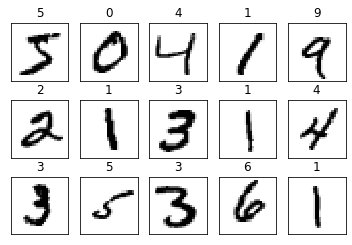

In [42]:
fig, ax = plt.subplots(3,5)
ax = ax.flatten()
ims = []
for i in range(len(ax)):
    ax[i].imshow(x[i].reshape(28,28), cmap='binary', interpolation='nearest', animated=True)
    ax[i].set_title(str(y[i]))
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)

mean accuracy:  0.874


<Figure size 432x288 with 0 Axes>

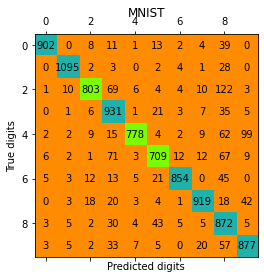

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[ -214.23804761   -31.47820709  -243.39283758  -412.61204135
  -161.56175199   103.02146015  -245.40214746   -32.70213188
 -1297.23305113  -570.06078343]


In [33]:
# use of stochastic gradient descent SGD classififier (capable of handling large datasets efficently and able to deal with training instances independently - suitable for online learning)
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

model = SGDClassifier(random_state=42, verbose=1, max_iter=10000)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print('mean accuracy: ', model.score(xtest, ytest))
cm = confusion_matrix(ytest, y_pred)

cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])

plt.figure()
plt.matshow(cm, cmap=cmap)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(x=j, y=i, s=cm[i,j],va='center',ha='center')

plt.title('MNIST')
plt.xlabel('Predicted digits')
plt.ylabel('True digits')
plt.show()

print(model.coef_)
print(model.intercept_)

In [ ]:
# cross-validation
from sklearn.model_selection import cross_val_score

model = SGDClassifier(random_state=42, verbose=1, max_iter=10000)
sc = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print('average accuracy = ', sc.mean)

model.fit(x,y)
y_pred = model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)

cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])

plt.figure()
plt.matshow(cm, cmap=cmap)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(x=j, y=i, s=cm[i,j],va='center',ha='center')

plt.title('MNIST')
plt.xlabel('Predicted digits')
plt.ylabel('True digits')
plt.show()

In [49]:
print(sc)
print(sc.mean())

[0.88014286 0.84171429 0.86507143 0.86721429 0.881     ]
0.8670285714285715


<Figure size 432x288 with 0 Axes>

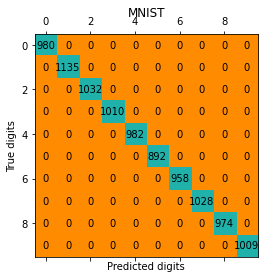

In [50]:
# confusion matrix for perfect predictions
cm = confusion_matrix(ytest, ytest)

cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])

plt.figure()
plt.matshow(cm, cmap=cmap)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    plt.text(x=j, y=i, s=cm[i,j],va='center',ha='center')

plt.title('MNIST')
plt.xlabel('Predicted digits')
plt.ylabel('True digits')
plt.show()